In [1]:
# Check GPU type and availability (This should be run on a T4 instance.)

import torch
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0))

GPU available: True
GPU name: Tesla T4


In [2]:
# Install GDown for downloading data from Google Drive

!pip -q install gdown

In [3]:
# Download the ZIP archive of the dataset from GDrive

import gdown

share_link = "https://drive.google.com/file/d/1o8ZxFqylNY37aoDljaFLhQDxv_iu9PdI/view?usp=drive_link"
file_id = share_link.split('/d/')[1].split('/view')[0]
gdown.download(f"https://drive.google.com/uc?id={file_id}", "ai-vehicle-id-dataset.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1o8ZxFqylNY37aoDljaFLhQDxv_iu9PdI
From (redirected): https://drive.google.com/uc?id=1o8ZxFqylNY37aoDljaFLhQDxv_iu9PdI&confirm=t&uuid=a77a8c3a-70cb-47d7-b594-287b9a0adb7a
To: /content/ai-vehicle-id-dataset.zip
100%|██████████| 2.06G/2.06G [00:22<00:00, 90.3MB/s]


'ai-vehicle-id-dataset.zip'

In [4]:
# Unpack the dataset into /content/train for training data and /content/val for validation data. Remove /content/__MACOSX folder.

import zipfile
import shutil
import os

print("Unpacking dataset into /content/")

with zipfile.ZipFile('/content/ai-vehicle-id-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

try:
  shutil.rmtree('/content/__MACOSX')
except FileNotFoundError:
  print("'/content/__MACOSX' not found, skipping removal.")

Unpacking dataset into /content/


In [22]:
# Remove folders named '__MACOSX' from the /content/train and /content/val folder trees.

import shutil

def remove_macosx_folders(root_path):
  """Removes '__MACOSX' folders from a given directory tree."""
  for dirpath, dirnames, filenames in os.walk(root_path):
    if '__MACOSX' in dirnames:
      macosx_path = os.path.join(dirpath, '__MACOSX')
      try:
        shutil.rmtree(macosx_path)
        print(f"Removed: {macosx_path}")
      except OSError as e:
        print(f"Error removing {macosx_path}: {e}")

# Remove __MACOSX folders from /content/train and /content/val
remove_macosx_folders('/content/train')
remove_macosx_folders('/content/val')

Removed: /content/train/truck/__MACOSX
Removed: /content/val/truck/__MACOSX


In [5]:
# Display Dataset Description from /content/README.md

from IPython.display import Markdown

with open('/content/README.md', 'r') as f:
  md_content = f.read()

display(Markdown(md_content))

# AI Vehicle Identification Datasets

Dataset Folder Structure

```
/train
  /cab
  /convertible
  /coupe
  /hatchback
  /minivan
  /Negative
  /sedan
  /suv
  /truck
  /van
  /wagon
/val
  /cab
  /convertible
  /coupe
  /hatchback
  /minivan
  /Negative
  /sedan
  /suv
  /truck
  /van
  /wagon  
 
```

Dataset Contents

* Image counts in train folders:
	
	* sedan: 1907
	* van: 291
	* suv: 1437
	* Negative: 200
	* truck: 347
	* cab: 719
	* hatchback: 554
	* coupe: 1054
	* minivan: 250
	* convertible: 1036
	* wagon: 253
	
* Image counts in validation folders:
	
	* sedan: 1880
	* van: 287
	* suv: 1418
	* Negative: 79
	* truck: 240
	* cab: 711
	* hatchback: 549
	* coupe: 1042
	* minivan: 248
	* convertible: 1022
	* wagon: 250

The images were sourced from the following datasets:

* Car Images - Standford Cars Dataset
	* Image Files - Download via KaggleHub - Dataset Name: jutrera/stanford-car-dataset-by-classes-folder

		```
		import kagglehub
		
		# Download latest version
		path = kagglehub.dataset_download("jutrera/stanford-car-dataset-by-classes-folder")
		
		print("Path to dataset files:", path)
		```

	* Dataset Description [Standford Cars Dataset](https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder/data)
	* License [ImageNet License](https://www.image-net.org/download.php)
* Truck Images - Images.CV - Trucks Dataset
	* Image Files [Images.CV Trucks Dataset](https://images.cv/dataset/truck-image-classification-dataset) 
	* License [Various Licenses - No Specific License Specified](https://images.cv/datasets-licenses)
* Negative Images - BG-20K Datset of Backgrounds
	* Image Files [BG-20K Google Drive](https://drive.google.com/drive/folders/1ZBaMJxZtUNHIuGj8D8v3B9Adn8dbHwSS)
	* Dataset Description [BG-20K GitHub](https://github.com/JizhiziLi/GFM?tab=readme-ov-file#bg-20k)
	* Usage Agreement [Dataset Agreement](https://jizhizili.github.io/files/gfm_datasets_agreements/BG-20k_Dataset_Release_Agreement.pdf)
	* License [MIT License](https://github.com/JizhiziLi/GFM/blob/master/LICENSE)



In [7]:
# Extract Tags Names from Folder Names

train_path = "/content/train"
tags_dataset = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
print(f"Found tags: {tags_dataset}")
print(len(tags_dataset))

Found tags: ['truck', 'cab', 'convertible', 'Negative', 'coupe', 'suv', 'wagon', 'van', 'hatchback', 'minivan', 'sedan']
11


In [8]:
# Display No. of Tags

print(f"No. of Tags: {len(tags_dataset)}")

No. of Tags: 11


In [9]:
# Display Tag Names

import pandas as pd

series = pd.Series(list(tags_dataset))
series

,0
0,truck
1,cab
2,convertible
3,Negative
4,coupe
5,suv
6,wagon
7,van
8,hatchback
9,minivan


In [10]:
# Enumerate the folders in /content/train and create a dictionary with folder name as the key, and folder path as the value

import os

def enumerate_folders(root_dir):
  """
  Enumerates folders within a given root directory and creates a dictionary
  with folder names as keys and folder paths as values.
  """
  folder_dict = {}
  for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):
      folder_dict[folder_name] = folder_path
  return folder_dict

# Example usage:
train_path = "/content/train"
tagged_folders = enumerate_folders(train_path)

tagged_folders

{'truck': '/content/train/truck',
 'cab': '/content/train/cab',
 'convertible': '/content/train/convertible',
 'Negative': '/content/train/Negative',
 'coupe': '/content/train/coupe',
 'suv': '/content/train/suv',
 'wagon': '/content/train/wagon',
 'van': '/content/train/van',
 'hatchback': '/content/train/hatchback',
 'minivan': '/content/train/minivan',
 'sedan': '/content/train/sedan'}

In [11]:
# Count the images in each folder under /content/train and /content/val

def count_images_in_folders(root_folder):
  """Counts the number of image files in each folder under the given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    A dictionary where keys are folder names and values are the number of images
    in each folder.
  """
  image_counts = {}
  for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
      image_count = 0
      for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
          image_count += 1
      image_counts[folder_name] = image_count
  return image_counts

# Count images in the train and validation folders
train_image_counts = count_images_in_folders('/content/train')
val_image_counts = count_images_in_folders('/content/val')

print("Image counts in train folders:")
for folder, count in train_image_counts.items():
  print(f"{folder}: {count}")

print("\nImage counts in validation folders:")
for folder, count in val_image_counts.items():
  print(f"{folder}: {count}")

Image counts in train folders:
truck: 347
cab: 719
convertible: 1036
Negative: 200
coupe: 1054
suv: 1437
wagon: 253
van: 291
hatchback: 554
minivan: 250
sedan: 1907

Image counts in validation folders:
truck: 240
cab: 711
convertible: 1022
Negative: 79
coupe: 1042
suv: 1418
wagon: 250
van: 287
hatchback: 549
minivan: 248
sedan: 1880


In [13]:
## Imports for Deep Learning

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# Setup paths, hyper-parameters, data-augmentation, re-scaling, &
# data-generators for training and validation.

# Path to your dataset
train_dir = '/content/train'
val_dir = '/content/val'

# Hyperparameters
IMG_SIZE = (224, 224)  # MobileNetV2 expects 224x224 images
BATCH_SIZE = 32
EPOCHS = 30

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values between 0 and 1
    rotation_range=5,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)


Found 8048 images belonging to 11 classes.
Found 7726 images belonging to 11 classes.


In [27]:
# Setup steps_per_epoch_train and steps_per_epoch_val. This is currently not working, after several attempts, so is not currently used.

# Get the total number of samples
num_train_samples = train_generator.samples
num_val_samples = val_generator.samples

# Calculate the number of steps per epoch, dropping incomplete batches - This may include incomplete batches.
#steps_per_epoch_train = num_train_samples // BATCH_SIZE  # Floor division
#steps_per_epoch_val = num_val_samples // BATCH_SIZE      # Floor division

# Calculate the number of steps per epoch, dropping incomplete batches - This should exclued incomplete batches.
steps_per_epoch_train = len(train_generator) - 1; #, (train_generator.samples // BATCH_SIZE)) # len(train_generator)
steps_per_epoch_val = len(val_generator) - 1; #, (val_generator.samples // BATCH_SIZE)) # len(val_generator)

(steps_per_epoch_train * EPOCHS, steps_per_epoch_val * EPOCHS),(num_train_samples, num_val_samples)

((7530, 7230), (8048, 7726))

In [28]:
len(train_generator), (train_generator.samples // BATCH_SIZE)

(252, 251)

In [33]:
# Load the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

# Add some extra layers, for global-average pooling, and prediction of 11 classes.
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(11, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

# Fix the feature extraction part of the model. Make the BatchNormalization layers trainable.
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

In [34]:
# Compile the model, define optimizer and the loss function
opt = Adam(learning_rate=0.01)

model_2.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [43]:
# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # Metric to monitor (can be 'val_accuracy', 'val_loss', etc.)
    patience=20,                  # Number of epochs to wait for improvement before stopping
    restore_best_weights=True     # Restore the weights of the best model
)

from sklearn.utils import class_weight

# Get the actual classes for all images in the generators
train_classes = train_generator.classes
val_classes = val_generator.classes

# Get the class indicies for all images in the generators
train_class_indicies = train_generator.class_indices
val_class_indicies = val_generator.class_indices

# Get the true labels and label indicies from the training generator
true_labels = train_classes          # The true labels are stored in the generator
class_indices = train_class_indicies  # A dictionary mapping class names to indices

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(true_labels),
    y=true_labels
)

class_weight_dict = dict(enumerate(class_weights))
print(f"Train Class Weight Dict.: {class_weight_dict}\n")
print(f"Train Classes: {np.unique(true_labels)}\n")
print(f"Train Class Weights: {class_weights}\n")
print(f"Train Class Indices: {class_indices}\n")

Train Class Weight Dict.: {0: 3.658181818181818, 1: 1.0175749146541915, 2: 0.7062127062127063, 3: 0.694152147662584, 4: 1.3206432556613061, 5: 2.9265454545454546, 6: 0.3836582924155027, 7: 0.5091415195799329, 8: 2.108462143044276, 9: 2.514214308028741, 10: 2.8918433345310817}

Train Classes: [ 0  1  2  3  4  5  6  7  8  9 10]

Train Class Weights: [3.65818182 1.01757491 0.70621271 0.69415215 1.32064326 2.92654545
 0.38365829 0.50914152 2.10846214 2.51421431 2.89184333]

Train Class Indices: {'Negative': 0, 'cab': 1, 'convertible': 2, 'coupe': 3, 'hatchback': 4, 'minivan': 5, 'sedan': 6, 'suv': 7, 'truck': 8, 'van': 9, 'wagon': 10}



In [44]:
## Tranfer training/learning of the model with 30 Epochs of training, keeping the ImageNet weights fixed.

history_2 = model_2.fit(
    train_generator,
    #steps_per_epoch=steps_per_epoch_train, # This is not currently working (mismatch with batch size?)
    validation_data=val_generator,
    #validation_steps=steps_per_epoch_val, # This is not currently working (mismatch with batch size?)
    class_weight=class_weight_dict,
    epochs=EPOCHS,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 129s 501ms/step - accuracy: 0.7964 - loss: 0.3919 - precision_2: 0.8259 - recall_2: 0.7758 - val_accuracy: 0.6816 - val_loss: 1.0652 - val_precision_2: 0.7115 - val_recall_2: 0.6558
Epoch 2/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 499ms/step - accuracy: 0.8341 - loss: 0.3263 - precision_2: 0.8545 - recall_2: 0.8148 - val_accuracy: 0.7160 - val_loss: 0.8866 - val_precision_2: 0.7514 - val_recall_2: 0.6859
Epoch 3/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 499ms/step - accuracy: 0.8510 - loss: 0.2837 - precision_2: 0.8729 - recall_2: 0.8366 - val_accuracy: 0.7356 - val_loss: 0.8751 - val_precision_2: 0.7524 - val_recall_2: 0.7165
Epoch 4/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 496ms/step - accuracy: 0.8420 - loss: 0.2966 - precision_2: 0.8610 - recall_2: 0.8261 - val_accuracy: 0.7832 - val_loss: 0.7338 - val_precision_2: 0.8023 - val_recall_2: 0.7660
Epoch 5/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 497ms/step - accuracy: 0.8665 - loss: 0.2634 - precision_2: 0.8821 

In [45]:
# Save the generated model (and remember to download the model before ending the Colab session.)

model_name = 'vehicle_classification_model_v005-efficient-net-adam-0.01-30-epochs-transfer-negative-included.keras'
model_2.save(model_name)

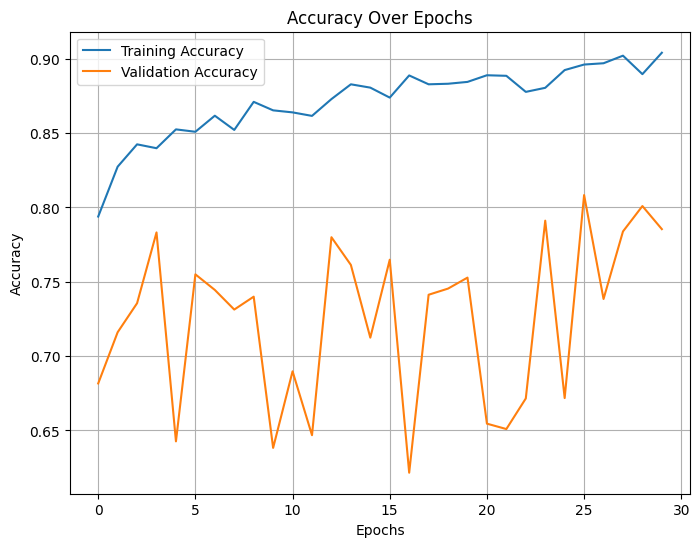

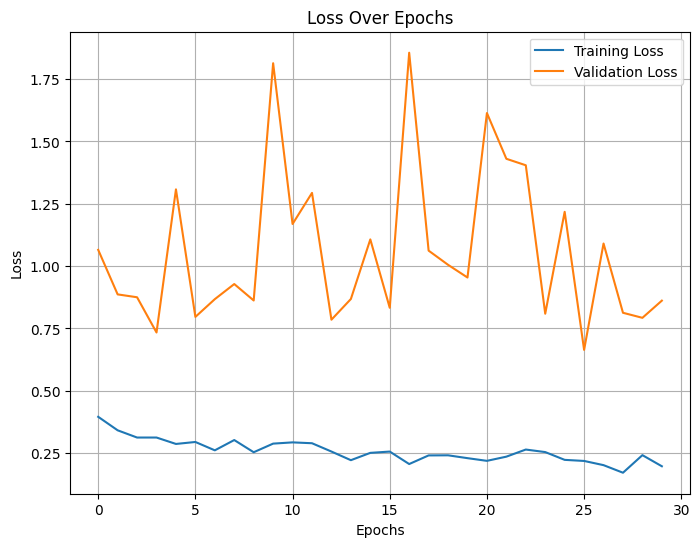

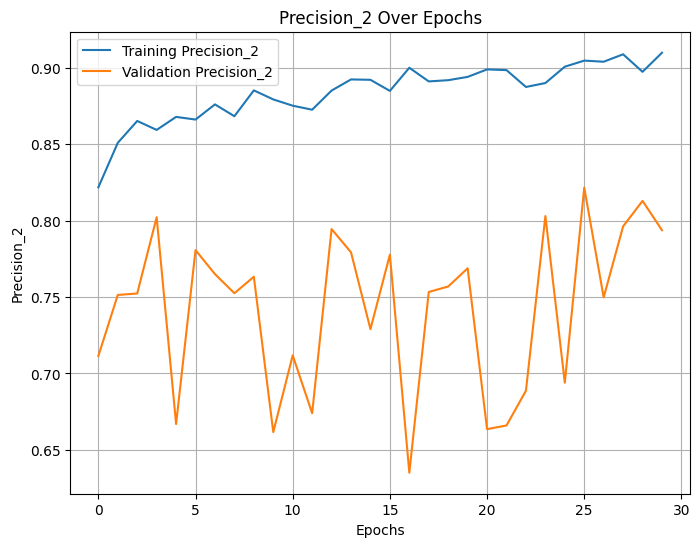

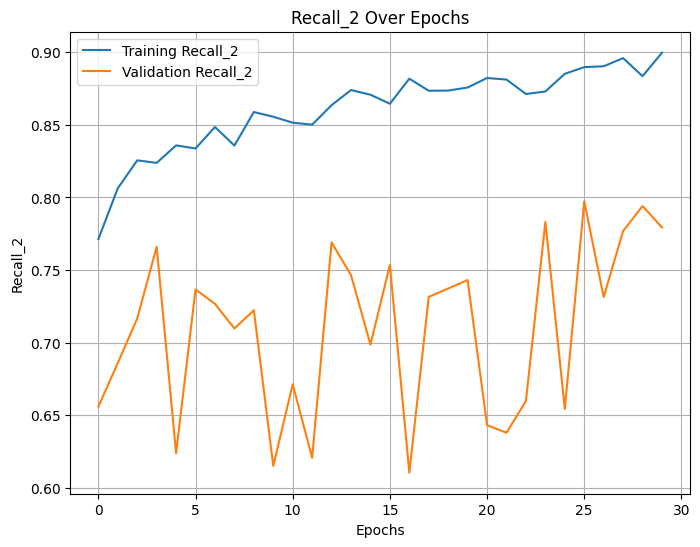

In [47]:
# Plot training history over 30 epochs of transfer learning.

import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot accuracy, loss, precision, and recall for training and validation.

    :param history: History object returned by model.fit()
    """
    # Extract metrics from history
    metrics = [key for key in history.history.keys() if not key.startswith('val_')]
    val_metrics = [f'val_{metric}' for metric in metrics]

    # Plot each metric
    for metric, val_metric in zip(metrics, val_metrics):
        if metric not in history.history:
            continue

        # Create a new figure
        plt.figure(figsize=(8, 6))
        plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
        plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'{metric.capitalize()} Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()


plot_training_history(history_2)

In [48]:
# Load the saved model from the file, as loaded_model so we do not alter model_2.

from tensorflow.keras.models import load_model
loaded_model = load_model('/content/' + model_name)

In [49]:
# Ten Epochs of additional training with all the model weigts now trainable.

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use ReduceLROnPlateau to adjust the learning rate dynamically
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',  # Metric to monitor
    factor=0.5,          # Factor by which to reduce the learning rate
    patience=3,          # Number of epochs with no improvement before reducing
    min_lr=1e-6          # Minimum learning rate to prevent it from getting too small
)

# Unfreeze the base model for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Recompile the model with a very low learning rate
fine_tuning_lr = 0.001  # Even lower learning rate for fine-tuning
loaded_model.compile(optimizer=Adam(learning_rate=fine_tuning_lr), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Continue training with the unfreezed base model
history_fine_tune = loaded_model.fit(
    train_generator,
    # steps_per_epoch=steps_per_epoch_train,
    validation_data=val_generator,
    # validation_steps=steps_per_epoch_val,
    class_weight=class_weight_dict,
    epochs=10,
    callbacks=[lr_scheduler]
)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 233s 670ms/step - accuracy: 0.8501 - loss: 0.3366 - precision_3: 0.8620 - recall_3: 0.8383 - val_accuracy: 0.0843 - val_loss: 252.1349 - val_precision_3: 0.0843 - val_recall_3: 0.0843 - learning_rate: 0.0010
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 129s 499ms/step - accuracy: 0.8770 - loss: 0.2254 - precision_3: 0.8922 - recall_3: 0.8694 - val_accuracy: 0.7907 - val_loss: 0.7408 - val_precision_3: 0.8060 - val_recall_3: 0.7811 - learning_rate: 0.0010
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 498ms/step - accuracy: 0.9056 - loss: 0.1740 - precision_3: 0.9142 - recall_3: 0.8989 - val_accuracy: 0.8470 - val_loss: 0.5200 - val_precision_3: 0.8567 - val_recall_3: 0.8392 - learning_rate: 0.0010
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 497ms/step - accuracy: 0.9078 - loss: 0.1789 - precision_3: 0.9162 - recall_3: 0.8967 - val_accuracy: 0.8523 - val_loss: 0.4863 - val_precision_3: 0.8636 - val_recall_3: 0.8452 - learning_rate: 0.0010
Epoch 5/10
252

In [50]:
# Save deep trained model

model_name_deep_train = 'vehicle_classification_model_v005-efficient-net-adam-0.01-30-epochs-transfer-10-epochs-deep-negative-included.keras'
loaded_model.save(model_name_deep_train)

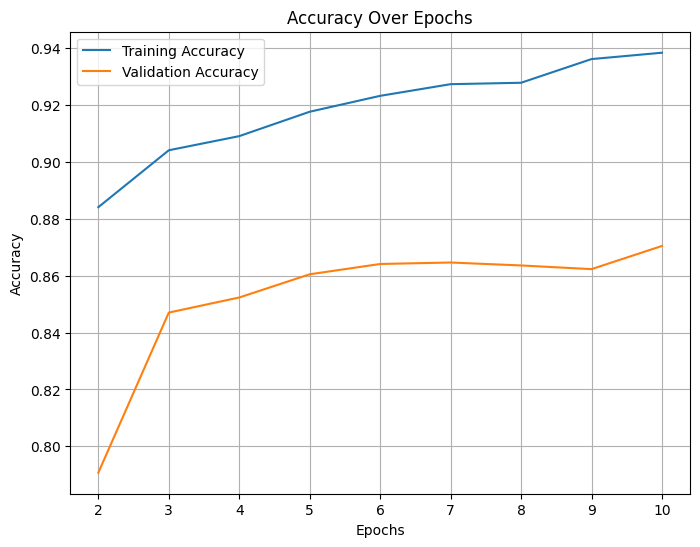

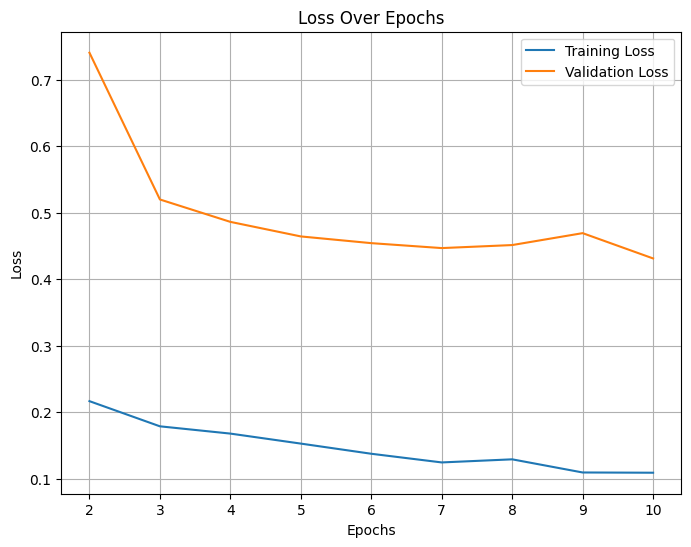

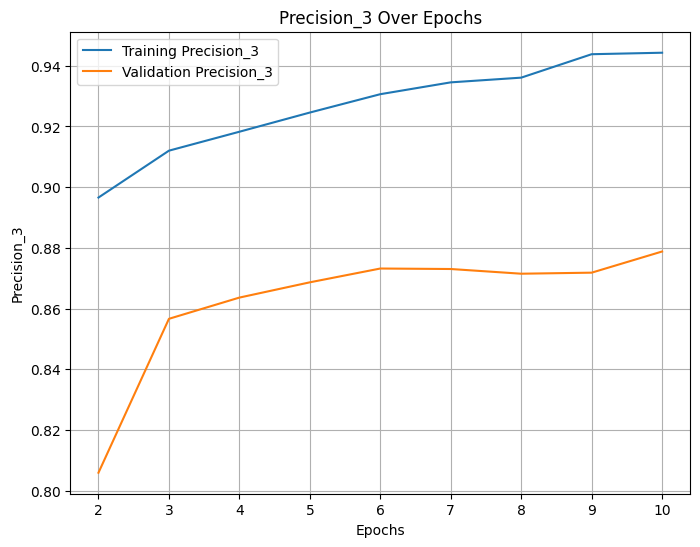

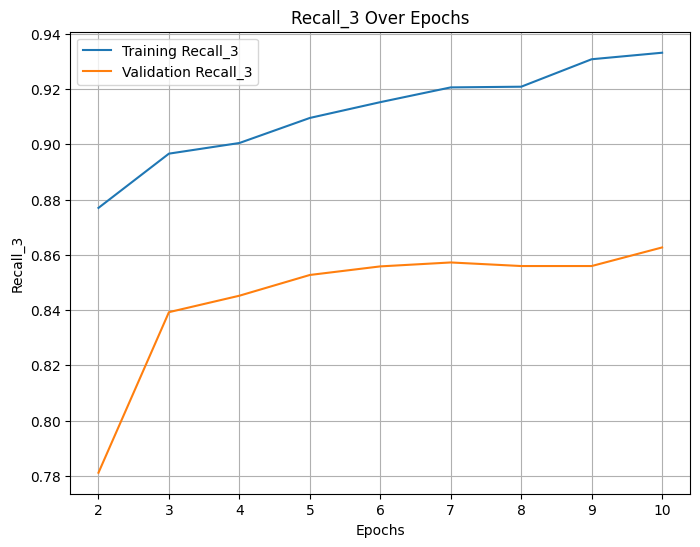

In [82]:
# Plot training history over 30 epochs of transfer learning.

import matplotlib.pyplot as plt

def plot_training_history_2(history):
    """
    Plot accuracy, loss, precision, and recall for training and validation.

    :param history: History object returned by model.fit()
    """
    # Extract metrics from history
    metrics = [key for key in history.history.keys() if not key.startswith('val_')]
    val_metrics = [f'val_{metric}' for metric in metrics]

    # Plot each metric
    for metric, val_metric in zip(metrics, val_metrics):
        if metric not in history.history:
            continue
        if val_metric == 'val_learning_rate':
            continue

        ordinal = list(range(2, len(history.history[metric][1:]) + 2))

        # Create a new figure
        plt.figure(figsize=(8, 6))
        plt.plot(ordinal, history.history[metric][1:],  label=f'Training {metric.capitalize()}')
        plt.plot(ordinal, history.history[val_metric][1:], label=f'Validation {metric.capitalize()}')
        plt.title(f'{metric.capitalize()} Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()

plot_training_history_2(history_fine_tune)

In [86]:
list(train_class_indicies.keys())

['Negative',
 'cab',
 'convertible',
 'coupe',
 'hatchback',
 'minivan',
 'sedan',
 'suv',
 'truck',
 'van',
 'wagon']

In [89]:
# Code to get 3 images from the 'val_generator' and make a prediction for each,
# and plot the image, predicted class, and prediction probability, using matplotlib.

import matplotlib.pyplot as plt

category_names = list(train_class_indicies.keys()) # ["car", "convertible", "coupe", "hatchback", "minivan", "sedan", "suv", "truck", "van", "wagon"]

def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(val_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = category_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = category_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +\
              'predicted: ' + predicted + ' with probability of: '\
               + str(val_pred)[:4])
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


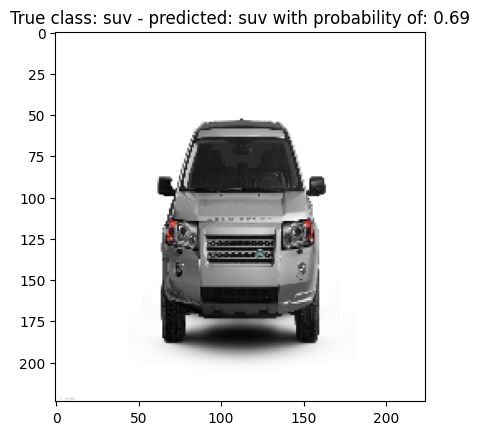

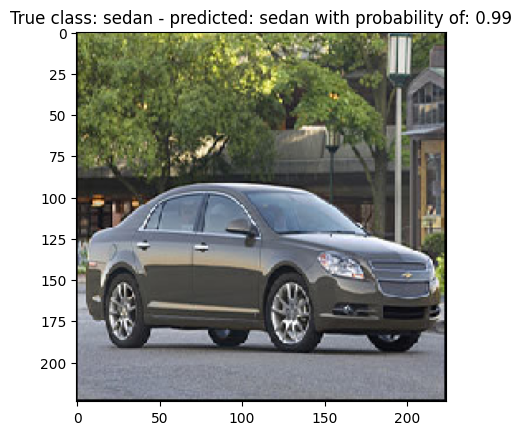

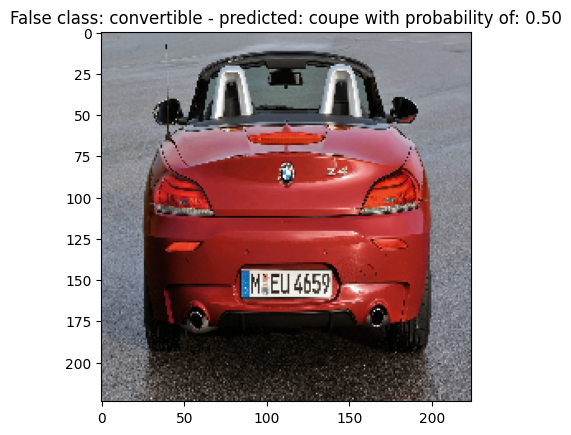

In [105]:
# Make prediction about 3 different car classes from validation dataset

predict_class(loaded_model)

In [121]:
# Because there is a mismatch between batch size and the number of epochs
# Things to not align properly for making generating a confusion matrix
# So we need to create the required data using batches from the
# val_generator, and making predictions/batch so that predcition align
# val_generator labels.

import numpy as np

# Step 1: Initialize empty lists to collect true labels and predictions
all_predictions = []
all_true_labels = []

# Step 2: Iterate over the validation generator
for image_batch, label_batch in val_generator:
    # Make predictions for the current batch
    predicted_batch = loaded_model.predict(image_batch)
    # Get the index of the highest probability for each prediction
    predicted_labels = np.argmax(predicted_batch, axis=1)
    all_predictions.extend(predicted_labels)

    # Collect the true labels (in the same order as provided)
    true_labels_batch = np.argmax(label_batch, axis=1)
    all_true_labels.extend(true_labels_batch)

    # Break if we've gone through the entire dataset
    if len(all_true_labels) >= val_generator.samples:
        break

# Step 3: Convert lists to numpy arrays for further processing
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [122]:
# Generate per class precision, recall, and f1 scores with support levels,
# and the Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate the classification report
report = classification_report(all_true_labels, all_predictions, target_names=val_generator.class_indices.keys())
print("Per-category statistics for the model:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Normalizing by the true labels (rows)
cm_normalized = confusion_matrix(all_true_labels, all_predictions, normalize='true')

print("Confusion Matrix:")
print(cm)


Per-category statistics for the model:
              precision    recall  f1-score   support

    Negative       0.91      0.99      0.95        83
         cab       0.95      0.97      0.96       716
 convertible       0.86      0.84      0.85      1009
       coupe       0.74      0.78      0.76      1056
   hatchback       0.79      0.75      0.77       546
     minivan       0.82      0.97      0.89       243
       sedan       0.86      0.86      0.86      1857
         suv       0.96      0.91      0.93      1434
       truck       0.97      0.95      0.96       240
         van       0.97      0.96      0.96       293
       wagon       0.80      0.90      0.85       249

    accuracy                           0.87      7726
   macro avg       0.88      0.90      0.89      7726
weighted avg       0.87      0.87      0.87      7726

Confusion Matrix:
[[  82    0    0    1    0    0    0    0    0    0    0]
 [   1  696    3    0    0    2    2    8    0    4    0]
 [   1    2  8

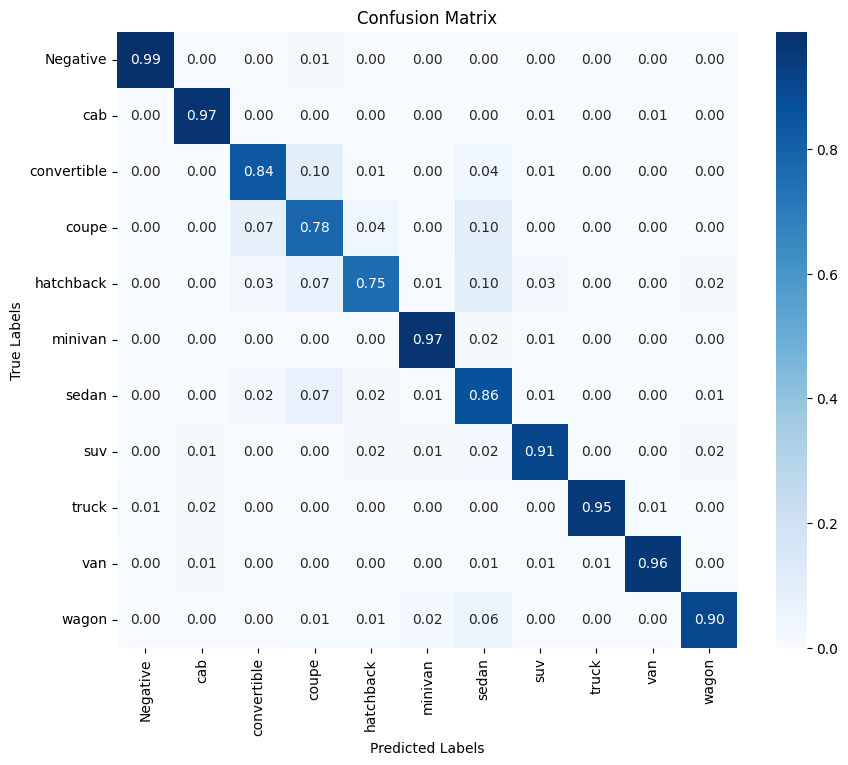

In [124]:
# Plot the Confusion Matrix

category_names = list(train_class_indicies.keys())

import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [125]:
# Load the saved model from the file, as loaded_model so we do not alter model_2.

from tensorflow.keras.models import load_model
loaded_model_deep = load_model('/content/' + model_name_deep_train)

In [127]:
# Ten extra epochs of additional training with all the model weigts now trainable.

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use ReduceLROnPlateau to adjust the learning rate dynamically
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',  # Metric to monitor
    factor=0.5,          # Factor by which to reduce the learning rate
    patience=3,          # Number of epochs with no improvement before reducing
    min_lr=1e-6          # Minimum learning rate to prevent it from getting too small
)

# Unfreeze the base model for fine-tuning (already done)
# for layer in base_model.layers:
#    layer.trainable = True

# Recompile the model with a very low learning rate
fine_tuning_lr = 0.001  # Even lower learning rate for fine-tuning
loaded_model_deep.compile(optimizer=Adam(learning_rate=fine_tuning_lr), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Continue training with the unfreezed base model
history_fine_tune = loaded_model_deep.fit(
    train_generator,
    # steps_per_epoch=steps_per_epoch_train,
    validation_data=val_generator,
    # validation_steps=steps_per_epoch_val,
    class_weight=class_weight_dict,
    epochs=10,
    callbacks=[lr_scheduler]
)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 237s 680ms/step - accuracy: 0.9433 - loss: 0.0959 - precision_4: 0.9492 - recall_4: 0.9388 - val_accuracy: 0.8730 - val_loss: 0.4331 - val_precision_4: 0.8810 - val_recall_4: 0.8662 - learning_rate: 0.0010
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 129s 501ms/step - accuracy: 0.9421 - loss: 0.1005 - precision_4: 0.9478 - recall_4: 0.9355 - val_accuracy: 0.8702 - val_loss: 0.4375 - val_precision_4: 0.8796 - val_recall_4: 0.8625 - learning_rate: 0.0010
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 130s 503ms/step - accuracy: 0.9449 - loss: 0.0951 - precision_4: 0.9514 - recall_4: 0.9381 - val_accuracy: 0.8730 - val_loss: 0.4233 - val_precision_4: 0.8819 - val_recall_4: 0.8669 - learning_rate: 0.0010
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 129s 500ms/step - accuracy: 0.9451 - loss: 0.0927 - precision_4: 0.9525 - recall_4: 0.9397 - val_accuracy: 0.8712 - val_loss: 0.4289 - val_precision_4: 0.8787 - val_recall_4: 0.8632 - learning_rate: 0.0010
Epoch 5/10
252/2

In [129]:
# Save deep trained model

model_name_deep_train_20 = 'vehicle_classification_model_v005-efficient-net-adam-0.01-30-epochs-transfer-20-epochs-deep-negative-included.keras'
loaded_model_deep.save(model_name_deep_train_20)

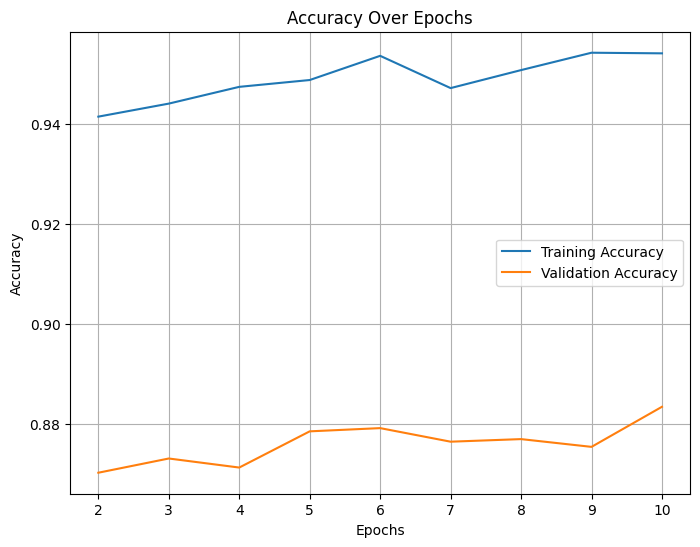

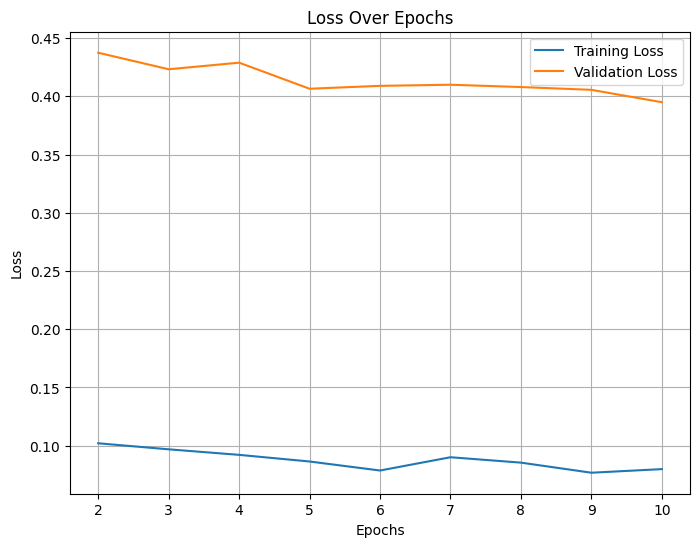

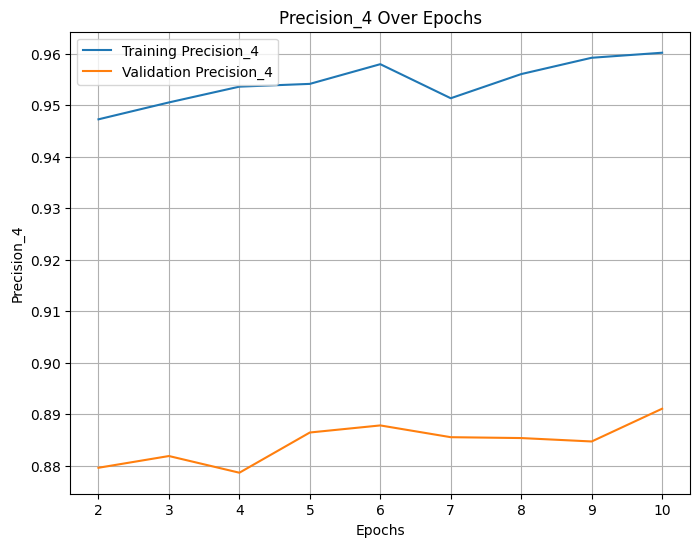

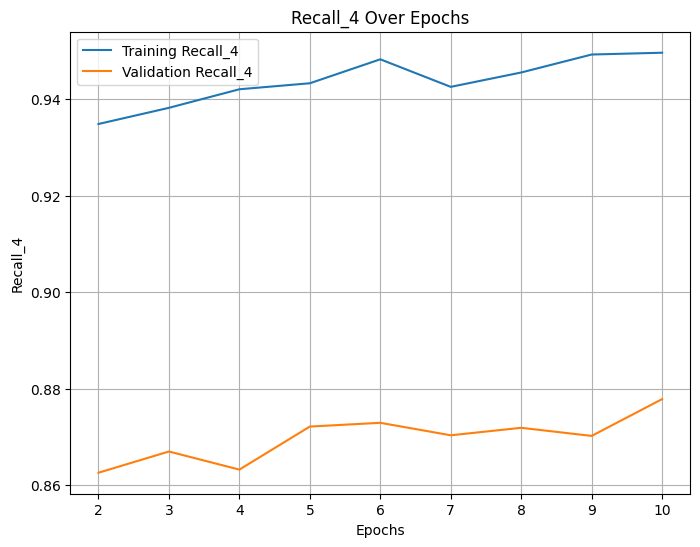

In [128]:
plot_training_history_2(history_fine_tune)

In [130]:
# Because there is a mismatch between batch size and the number of epochs
# Things to not align properly for making generating a confusion matrix
# So we need to create the required data using batches from the
# val_generator, and making predictions/batch so that predcition align
# val_generator labels.

import numpy as np

# Step 1: Initialize empty lists to collect true labels and predictions
all_predictions = []
all_true_labels = []

# Step 2: Iterate over the validation generator
for image_batch, label_batch in val_generator:
    # Make predictions for the current batch
    predicted_batch = loaded_model_deep.predict(image_batch)
    # Get the index of the highest probability for each prediction
    predicted_labels = np.argmax(predicted_batch, axis=1)
    all_predictions.extend(predicted_labels)

    # Collect the true labels (in the same order as provided)
    true_labels_batch = np.argmax(label_batch, axis=1)
    all_true_labels.extend(true_labels_batch)

    # Break if we've gone through the entire dataset
    if len(all_true_labels) >= val_generator.samples:
        break

# Step 3: Convert lists to numpy arrays for further processing
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━

In [131]:
# Generate per class precision, recall, and f1 scores with support levels,
# and the Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate the classification report
report = classification_report(all_true_labels, all_predictions, target_names=val_generator.class_indices.keys())
print("Per-category statistics for the model:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Normalizing by the true labels (rows)
cm_normalized = confusion_matrix(all_true_labels, all_predictions, normalize='true')

print("Confusion Matrix:")
print(cm)

Per-category statistics for the model:
              precision    recall  f1-score   support

    Negative       0.95      0.99      0.97        77
         cab       0.97      0.97      0.97       711
 convertible       0.89      0.83      0.86      1018
       coupe       0.77      0.80      0.78      1062
   hatchback       0.80      0.78      0.79       535
     minivan       0.90      0.96      0.93       246
       sedan       0.87      0.89      0.88      1892
         suv       0.95      0.93      0.94      1406
       truck       0.96      0.96      0.96       235
         van       0.97      0.96      0.96       287
       wagon       0.83      0.90      0.86       257

    accuracy                           0.88      7726
   macro avg       0.90      0.91      0.90      7726
weighted avg       0.89      0.88      0.88      7726

Confusion Matrix:
[[  76    0    0    1    0    0    0    0    0    0    0]
 [   1  691    3    0    0    0    2   11    0    2    1]
 [   0    2  8

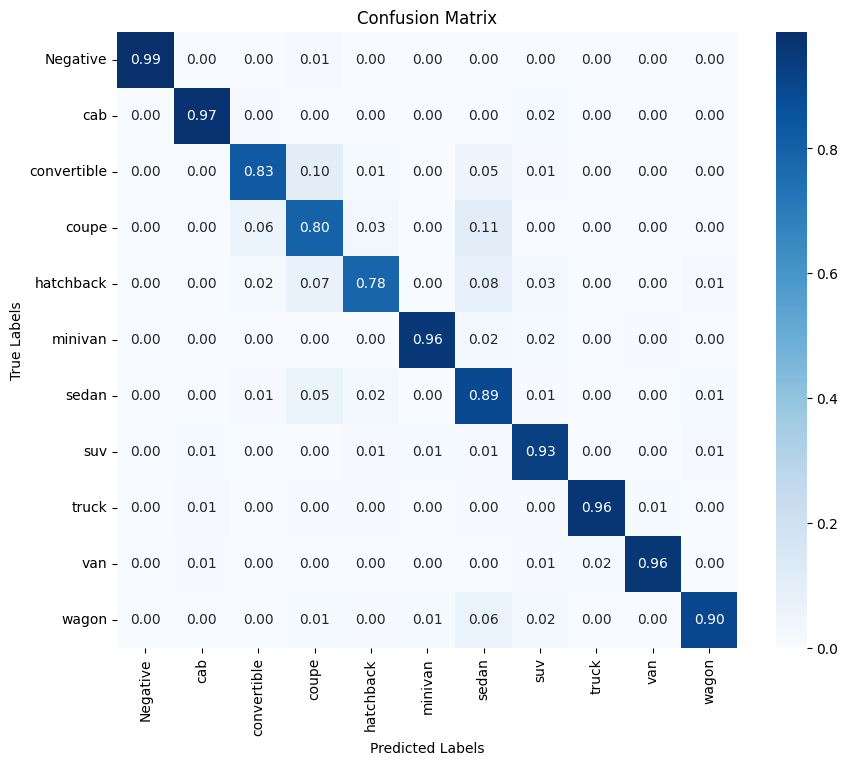

In [132]:
# Plot the Confusion Matrix

category_names = list(train_class_indicies.keys())

import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()